In [3]:
%matplotlib inline
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [4]:
tay=pd.read_csv('Tayko.csv')

##### tay의 열 이름
'sequence_number', 'US', 'source_a', 'source_c', 'source_b', 'source_d',
       'source_e', 'source_m', 'source_o', 'source_h', 'source_r', 'source_s',
       'source_t', 'source_u', 'source_p', 'source_x', 'source_w', 'Freq',
       'last_update_days_ago', '1st_update_days_ago', 'Web order',
       'Gender=male', 'Address_is_res', 'Purchase', 'Spending'

In [5]:
##a

In [42]:
tay=tay[['US', 'Address_is_res', 'Gender=male', 'Web order', 'last_update_days_ago', 'Freq','Spending']]
tay_class=tay[['US', 'Address_is_res', 'Gender=male', 'Web order', 'Spending']]
tay_class.drop(['Spending'], axis = 1)

,US,Address_is_res,Gender=male,Web order
0,1,1,0,1
1,1,0,1,1
2,1,0,0,0
3,1,0,1,0
4,1,0,0,0
...,...,...,...,...
1995,1,0,0,1
1996,1,0,1,1
1997,1,0,0,0
1998,1,1,1,0


In [43]:
us_1=tay_class[tay_class['US']==1].Spending.describe()
us_0=tay_class[tay_class['US']==0].Spending.describe()

add_1=tay_class[tay_class['Address_is_res']==1].Spending.describe()
add_0=tay_class[tay_class['Address_is_res']==0].Spending.describe()

gender_1=tay_class[tay_class['Gender=male']==1].Spending.describe()
gender_0=tay_class[tay_class['Gender=male']==0].Spending.describe()

web_1=tay_class[tay_class['Web order']==1].Spending.describe()
web_0=tay_class[tay_class['Web order']==0].Spending.describe()

In [44]:
data={'us_1':us_1, 'us_0':us_0,
      'add_1':add_1, 'add_0':add_0,
      'gender_1':gender_1, 'gender_0':gender_0,
      'web_1':web_1, 'web_0':web_0           
     }

data2={'mean':pd.DataFrame(data).mean(), 'std':pd.DataFrame(data).std()}
pd.DataFrame(data2)


,mean,std
us_1,449.775058,698.928156
us_0,278.882616,484.747687
add_1,183.734811,234.639178
add_0,438.978415,677.057361
gender_1,372.046359,574.150090
gender_0,357.771497,539.349506
web_1,357.176671,517.700987
web_0,379.289941,594.121612


In [22]:
t_gender=tay[['Gender=male','Spending']].groupby('Gender=male').describe()
t_order=tay[['Web order','Spending']].groupby('Web order').describe()
t_res=tay[['Address_is_res','Spending']].groupby('Address_is_res').describe()
t_purchase=tay[['Purchase','Spending']].groupby('Purchase').describe()

print("[Gender]\n", t_gender)
print("\n\n[Web order]\n", t_order)
print("\n\n['Address_is_res']\n", t_res)
print("\n\n['Purchase']\n", t_purchase) 
## 구매여부를 물어보는 변수인데 책에는 나와있지 않은 변수이기에 고려하지 않고 다음 문제부터 적용

[Gender]
             Spending                                                      
               count        mean        std  min  25%   50%    75%     max
Gender=male                                                               
0              951.0  107.339642  190.83233  0.0  0.0  10.0  160.0  1443.0
1             1049.0   98.350810  183.02006  0.0  0.0   0.0  146.0  1500.0


[Web order]
           Spending                                                        
             count        mean         std  min  25%   50%     75%     max
Web order                                                                 
0           1148.0   82.902439  173.417088  0.0  0.0   0.0  130.00  1500.0
1            852.0  129.199531  200.463840  0.0  0.0  68.5  164.25  1443.0


['Address_is_res']
                Spending                                                      
                  count        mean         std  min  25%  50%    75%     max
Address_is_res                                 

In [23]:
#b 연속형 변수들에 대해 산점도 만들기

In [24]:
import matplotlib.pyplot as plt

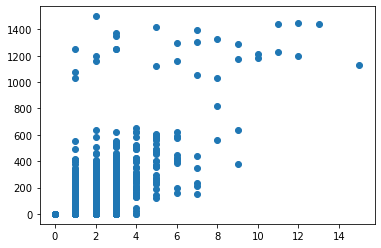

In [25]:
plt.scatter(tay['Freq'],tay['Spending'])
plt.show()

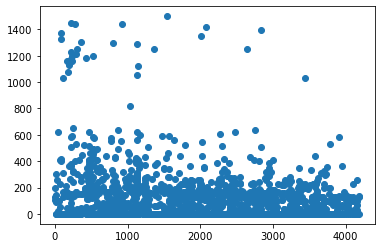

In [26]:
plt.scatter(tay['last_update_days_ago'],tay['Spending'])
plt.show()

In [27]:
###### 선형관계가 있어 보이지 않는다.

In [28]:
#c 

In [29]:
##1 학습세트와 검정세트 나누기

In [76]:
predictors = ['US', # 미국 주소지인지에 대한 여부
              'Freq', # 전년도 거래일수
       'last_update_days_ago', # 최종갱신일로부터 경과일수
              'Web order', #고객이 인터넷 구매 여부
       'Gender=male', #성별
              'Address_is_res'] #거주지 주소인지에 대한 여부
outcome = 'Spending' ## 6개의 예측변수

X = pd.get_dummies(tay[predictors], drop_first=True)
y = tay[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

In [38]:
##2 6개의 예측변수를 사용하여 다중 선형회귀 모형 제시

In [43]:
tay_lm = LinearRegression()
tay_lm.fit(train_X, train_y)

print("Intercept", round(tay_lm.intercept_,3))
print(pd.DataFrame({'Preditior': X.columns, 'coefficient': tay_lm.coef_})) # 계수 print

Intercept 10.176
              Preditior  coefficient
0                    US    -4.620293
1                  Freq    91.274450
2  last_update_days_ago    -0.010374
3             Web order    18.628731
4           Gender=male    -9.111366
5        Address_is_res   -75.815354


In [54]:
## 선형회귀식 모형 : y = 10.176 - 4.62x1 + 91.274x2 - 0.01x3 + 18.629x4 - 9.111x5 - 75.815x6

## x1 US
## x2 Freq
## x3 last_update_days_ago
## x4 Web order
## x5 Gender
## x6 Address_is_res

In [55]:
##3 가장 많은 돈을 지출할 것 같은 고객의 유형?

In [56]:
## 위의 선형회귀식 모형의 부호를 통해 알 수 있다.
# 미국에 거주하지 않고
# 전년도 거래일수가 많고
# 최종갱신일로부터 경과일수가 작고
# 인터넷 구매여부가 있고
# 성별이 여자이고
# 거주지 주소가 아닌 고객이 가장 많은 돈을 지출한다.

In [ ]:
##4 예측변수를 줄이기 위해 후방소거법 어떤 예측변수가 가장 먼저 탈락?

In [57]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: US, Freq, last_update_days_ago, Web order, Gender=male, Address_is_res
Start: score=15028.53
Step: score=15026.76, remove US
Step: score=15026.38, remove Gender=male
Step: score=15026.38, remove None
['Freq', 'last_update_days_ago', 'Web order', 'Address_is_res']


In [58]:
## 제일 처음으로 US 미국 주소인지 여부를 알려주는 변수가 탈락한다.

In [59]:
##5 검증데이터의 첫번째 구매데이터를 이용해 예측값과 예측오차 구하기

In [61]:
valid_X.head(1)

,US,Freq,last_update_days_ago,Web order,Gender=male,Address_is_res
674,1,2,1346,0,1,1


In [67]:
valid_y.head(1)

674    0
Name: Spending, dtype: int64

In [68]:
y = 10.176 - 4.62*1 + 91.274*2 - 0.01*1346 + 18.629*0 - 9.111*1 - 75.815 * 1 
print('예측값: ', y)
print('실제값: ', 0)
print('예측오차: ', 0-y)

예측값:  89.71800000000002
실제값:  0
예측오차:  -89.71800000000002


In [69]:
##6 검증세트에 대한 모델성능을 검토한 후 모델의 예측 정확도를 평가하시오

In [78]:
pred_y = tay_lm.predict(valid_X)
regressionSummary(valid_y, pred_y) # 검증 세트에 대한 성능 파악


Regression statistics

               Mean Error (ME) : 7.1933
Root Mean Squared Error (RMSE) : 136.7397
     Mean Absolute Error (MAE) : 83.6010


In [79]:
print('adjusted r2 : ', adjusted_r2_score(valid_y, pred_y, tay_lm)) 
print('AIC : ', AIC_score(valid_y, pred_y, tay_lm))
print('BIC : ', BIC_score(valid_y, pred_y, tay_lm)) 

adjusted r2 :  0.4915759673170541
AIC :  10155.227820697535
BIC :  10192.704714518879


In [81]:
##7 모델 잔차에 대한 히스토그램 작성, 정규분포따르는가, 모델 예측 성능에 어떤 영향 ?

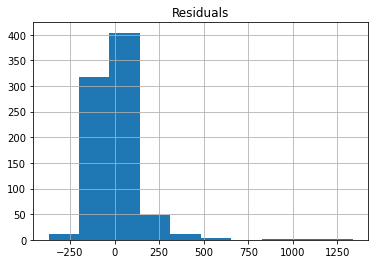

In [82]:
tay_residuals = valid_y - pred_y
ax = pd.DataFrame({"Residuals":tay_residuals}).hist()

plt.show()

In [83]:
## 왼쪽으로 치우쳐 있어 정규분포라 보기 어렵다.
## 모델 예측 성능으로 볼 때 좋다고 하기 어렵다.